In [3]:
!unzip /content/classes.zip

Archive:  /content/classes.zip
   creating: classes/
   creating: classes/1_1_11_1/
  inflating: classes/1_1_11_1/1_1_11_1_127.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_126.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_125.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_124.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_123.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_122.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_121.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_120.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_119.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_118.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_117.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_116.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_115.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_114.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_113.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_112.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_111.jpeg  
  inflating: classes/1_1_11_1/1_1_11_1_110.jpeg  
  inflating: cla

In [0]:
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout,MaxPool2D
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [30]:
def make_data():
    imageData=[]
    labels=[]
    data=[]
    features=28*28*3
    noImage=96000
    nClass=96
    path=os.getcwd()
    folderpath=os.path.join(path,"classes")

    label=-1
    for length in range(2):
        for width in range(2):
            for angle in range(12):
                for color in range(2):

                    string=str(length)+"_"+str(width)+"_"+str(angle)+"_"+str(color)
                    fpath=folderpath+"/"+string

                    ipath=fpath+"/"+str(length)+"_"+str(width)+"_"+str(angle)+"_"+str(color)
                    label=label+1
                    
                    for image in range(1000):
                        iName=ipath+"_"+str(image)+".jpeg"
                        img_data=cv2.imread(iName)
                        data.append(img_data)#.reshape(features))
                        labels.append(label)
                        
    numbers = np.arange(96000)
    np.random.shuffle(numbers)
    print(numbers[:10])
    
    newDat = []
    newLabel = []
    for i in numbers:
      newDat.append(data[i])
      newLabel.append(labels[i])
    newDat = np.array(newDat)
    newLabel = np.array(newLabel)
    print(newDat.shape)
    print(newLabel.shape)
    
#     print(numbers[-1])
#     imageData=np.array(data,float)#.reshape(noImage,features)
#     labels=np.array(labels,float).reshape(noImage,1)
#     print("data shape: ",imageData.shape)
#     print("labels shape: ",labels.shape)
    
#     imageData=imageData/255.0
#     data=np.concatenate((imageData,labels),axis=0)
#     np.random.shuffle(data)
#     data=data.reshape(noImage,features+1)
    
#     ipt=data[:,:-1]
#     opt=np.array(data[:,-1],int).reshape(noImage,1)
#     b=np.zeros((noImage,nClass),int)
#     for i in range(noImage):
#         b[i,opt[i]]=1
    newDat = newDat/255.0
    return newDat,newLabel
x,y=make_data()

[51546 85680  4344 27022  7256 23896 16723 80072 25927 89055]
(96000, 28, 28, 3)
(96000,)


In [0]:
# def getImageVariable(path):
#     classFolder=path
# #     imagePath="/classes"
#     imageList=[]
#     cnt=0
#     tempArry=np.zeros((96000,5),int)

#     for length in range(2):
#         for width in range(2):
#             for angle in range(12):
#                 for color in range(2):
                    
#                     for variation in range(10):
#                         tempArry[cnt,:]=[cnt,length,width,angle,color]
#                         cnt+=1
#     np.random.shuffle(tempArry)
    
#     for i in range(96000):
#         string="/"+str(tempArry[i][1])+"_"+str(tempArry[i][2])+"_"+str(tempArry[i][3])+"_"+str(tempArry[i][4])
#         imgFolder=classFolder+string
#         img=imgFolder+string+"_"+str(tempArry[i][0]%1000)+".jpeg"
#         imageList.append(cv2.imread(img))
        
#     return imageList,tempArry[:,1],tempArry[:,2],tempArry[:,3],tempArry[:,4]


# imagePath="./classes" # jaha imagees ka folder h
# a,b,c,d,e=getImageVariable(imagePath)
# print(a[0],b[0],c[0],d[0],e[0])

In [0]:
# x,y=make_data()

In [33]:
nx = x
ny = y
zy = ny

print(nx.shape)
print(ny.shape)

(96000, 28, 28, 3)
(96000,)


In [0]:
# flat_list = []
# for sublist in ny:
#     for item in sublist:
#         flat_list.append(item)
# zy = flat_list
# # print(y.shape)
# print(zy[np.argmax(zy)])

In [35]:
splitSize = int(nx.shape[0]*0.6)
nx, testData = nx[:splitSize,:], nx[splitSize:,:]
zy, testY = zy[:splitSize], zy[splitSize:]
print(zy[:20])

[51 85  4 27  7 23 16 80 25 89 31 15 15 25 57 44 66 13 91 21]


In [36]:
print(nx.shape)
# print(zy.shape)
nx = nx.astype('float32')
# nx /= 255
# nx = nx.reshape(nx.shape[0], 28, 28, 3)
# testData = testData.reshape(testData.shape[0], 28, 28, 3)
print(nx.shape)
zy = np.array(zy)
testY = np.array(testY)
print(zy.shape)
print(testData.shape)
print(testY.shape)

# testData = testData.astype('float32')
# testData /= 255
# testData = testData.reshape(x.shape[0], 28, 28, 1)

(57600, 28, 28, 3)
(57600, 28, 28, 3)
(57600,)
(38400, 28, 28, 3)
(38400,)


In [0]:
# print(y[:10])
# y_lab = []
# cnt = 0
# for val in y:
#     if cnt < 10:
#         print(val)
#         cnt += 1
#     y_lab.append(np.argmax(val)+1)
# y = np.array(y_lab)

# print(y[:10])

# y_lab = []
# for val in testY:
#     y_lab.append(np.argmax(val)+1)
# testY = y_lab

In [38]:
model2 = Sequential()
model2.add(Conv2D(36, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,3)))
model2.add(MaxPool2D(pool_size=(2,2), strides=2))
model2.add(BatchNormalization())
# model2.add(Conv2D(36, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,3)))
# model2.add(MaxPool2D(pool_size=(2,2), strides=2))
model2.add(Conv2D(36, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,3)))
model2.add(MaxPool2D(pool_size=(2,2), strides=2))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(1024, activation="relu"))

model2.add(Dense(96, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# print(y_train.shape)
num_epochs = 3
infoFit = model2.fit(nx, zy, batch_size=64, epochs=num_epochs)

score = model2.evaluate(testData, testY)
pred = model2.predict(testData)
print('\n', 'Test Acc = ', score[1])
# print('\n'," Predictions: ", pred)



# print(infoFit.history['loss'])
# plt.plot(np.arange(num_epochs), infoFit.history['loss'])
# plt.xlabel("Epochs")
# plt.ylabel("Loss")

# plt.savefig("loss_lineSet.png")

# plt.figure()

# plt.plot(np.arange(num_epochs), infoFit.history['acc'])
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")

# plt.savefig("acc_lineSet.png")

# totalTest = 38400.0
# correctClassify = 0

# result = pred

# result

# o = np.zeros(38400)


# for i in range(38400):
#   o[i] = np.argmax(pred[i])

# from sklearn.metrics import classification_report, confusion_matrix
# matrix = confusion_matrix(testY, o)
# cr = classification_report(testY, o)
# # print(matrix)
# print(cr[:2])

# num = 1
# for row in matrix:
#   print("Class ",num, " & ")
#   num+=1
#   nx = 0
#   for e in row:
#     nx += 1
#     if nx <95:
#       print(e, end=" & ")
#     else:
#       print(e,end=" ")
#   print(end="\\\\ \\hline \n")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 36)        5328      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 36)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 36)        144       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 36)        63540     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 7, 36)          144       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
__________

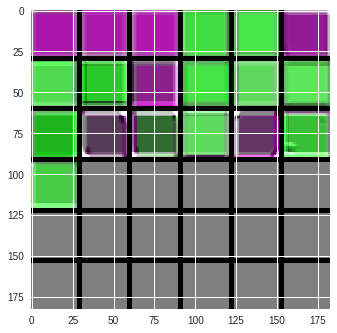

In [69]:
model = model2
def decodeImg(y):
  '''function to convert a float array into 
     a valid unit8 image '''
  
  # normalizing the input
  y -= y.mean()
  y /= (y.std() + K.epsilon())
  y *= 0.25
  
  # clipping to [0,1]
  y += 0.5
  y = np.clip(y, 0, 1)
  
  # converting to RGB array
  y *= 255
  y = np.clip(y, 0, 255).astype('uint8')
  return y

# visualization for convolutional filters

def visualizeFilter(filterNum, imSize=28, epochs=20, alpha=0.1):
  
  layerOutput = model.get_layer(layerName).output
  
  # to maximize the output of the corresponding filter
  loss = K.mean(layerOutput[:,:,:,filterNum])
  
  # computing gradient wrt to each input pixel
  # it is list of tensor so applied the indexing
  gradients = K.gradients(loss, model.input)[0]
  
  # normalizing the gradients
  gradients /= (K.sqrt(K.mean(K.square(gradients))) + K.epsilon())

  loopOver = K.function([model.input], [loss, gradients])
  
#   inpImage = (np.random.random((1, imSize, imSize, 3)) - 0.5) * 20 + 128
  inpImage = np.zeros((1, imSize, imSize, 3))
  
  for _ in range(epochs):
    lossVal, gradVal = loopOver([inpImage])
    inpImage += gradVal * alpha

  # taking in the actual image size
  return decodeImg(inpImage[0]), lossVal

def makeVisualization(filters, n=None):
  '''plot the visualizations of the filters'''
  
  if n is None:
    n = int(np.floor(np.sqrt(len(filters))))
    
  filters.sort(key=lambda x: x[1], reverse=True)
  filters = filters[:n * n]
  
  MARGIN = 3
  width = n * dim + (n - 1) * MARGIN
  height = n * dim + (n - 1) * MARGIN
  
  # making a black image and then paste our visualizations onto that
  allFilters = np.zeros((width, height, 3), dtype='uint8')
  
  # filling the above with our visualizations
  for i in range(n):
    for j in range(n):
      img, _ = filters[i * n + j]
      widthMargin = (dim + MARGIN) * i
      heightMargin = (dim + MARGIN) * j
      
      allFilters[
          widthMargin: widthMargin + dim,
          heightMargin: heightMargin + dim, :] = img
  
  allFilters[:, :, 0], allFilters[:, :, 2] = allFilters[:, :, 2], allFilters[:, :, 0]
  vis = allFilters
#   vis.save('visualize.png')
#   vis.show()
  plt.imshow(allFilters)
  
layerName = 'conv2d_2'
# inputImg = model.inputs[0]
# print(inputImg.op.type)
# layerDict = dict([(layer.name, layer) for layer in model.layers[1:]])
# outputLayer = layerDict[layerName]
# print(outputLayer.output.shape)

processedFilters = []
for fl in range(model.get_layer(layerName).output.shape[-1]):
  imgLoss = visualizeFilter(fl)
  
  if imgLoss is not None:
    processedFilters.append(imgLoss)

dim = 28
makeVisualization(processedFilters)
    

zs:  (1, 28, 28, 3)
zs:  (1, 28, 28, 3)
(?,)
(1, 28, 28, 3)


<Figure size 576x396 with 0 Axes>

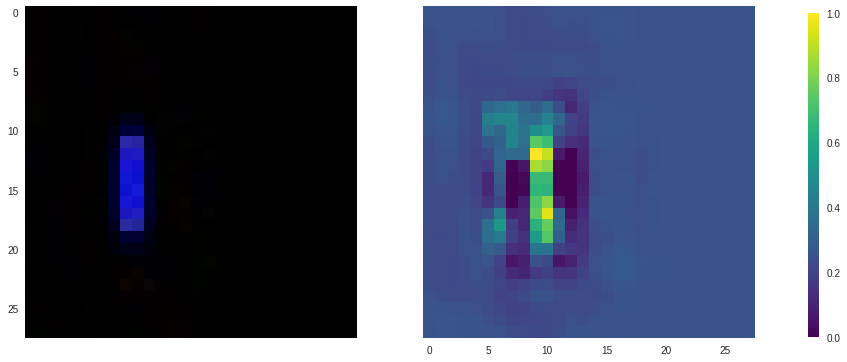

In [85]:
# import matplotlib.pyplot as plt
# imgPath = "/content/classes/0_1_7_0/0_1_7_0_0.jpeg"

# # z is a float32 Numpy array of shape (28, 28, 3)
# z = cv2.imread(imgPath)

# # adding a dimension to transform the array into a batch
# z = np.expand_dims(z, axis=0)
# z = np.array(z, dtype=np.float32)
# z /= 255.0
print("zs: ",z.shape)
num = 19
z = np.array([testData[num]])
print("zs: ",z.shape)

preds = model.predict(z)
# print(preds)

# pass the class here
lineOutput = model.outputs[0][:,testY[num]]
print(lineOutput.shape)

# gradient of one of the output class wrt to the output feature map of the given layer
grads = K.gradients(lineOutput, model.get_layer(layerName).output)[0]

# print(grads.shape)

# return the mean intensity of the gradient over a specific feature map channel
pooledGrads = K.mean(grads, axis=(0,1,2))

# print(pooledGrads)

# below function allows to access the values of pooledGrads and the output feature map
# given a image
iterate = K.function([model.input], [pooledGrads, model.get_layer(layerName).output[0]])

# get the value for the given input
pooledValue, convOutput = iterate([z])

# print(pooledValue)

# multiplying each channel(filter) in the feature map array by 'how
# important the channel is with reagrd to given class'
for i in range(model.get_layer(layerName).output.shape[-1]):
  convOutput[:, :, i] *= pooledValue[i]
  
# channel wise mean of the resulting feature map
heatmap = np.mean(convOutput, axis=-1)

# for visualization normalizing the value b/w 0 and 1
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(15,15))
# plt.grid(False)
ax[1].set_yticklabels([])
ax[0].set_xticklabels([])
ax[1].grid(False)
ax[0].grid(False)

print(z.shape)
im = ax[1].imshow(heatmap, cmap="viridis")
ax[0].imshow(z.squeeze())
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.35, 0.01, 0.3])
fig.colorbar(im, cax=cbar_ax, aspect=10)

plt.savefig("hm.png")
# plt.show(heatmap)

In [44]:
print(testData.shape)

(38400, 28, 28, 3)


(28, 28, 3)


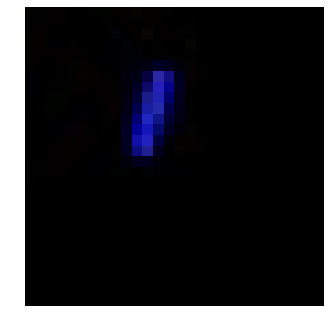

<Figure size 576x396 with 0 Axes>

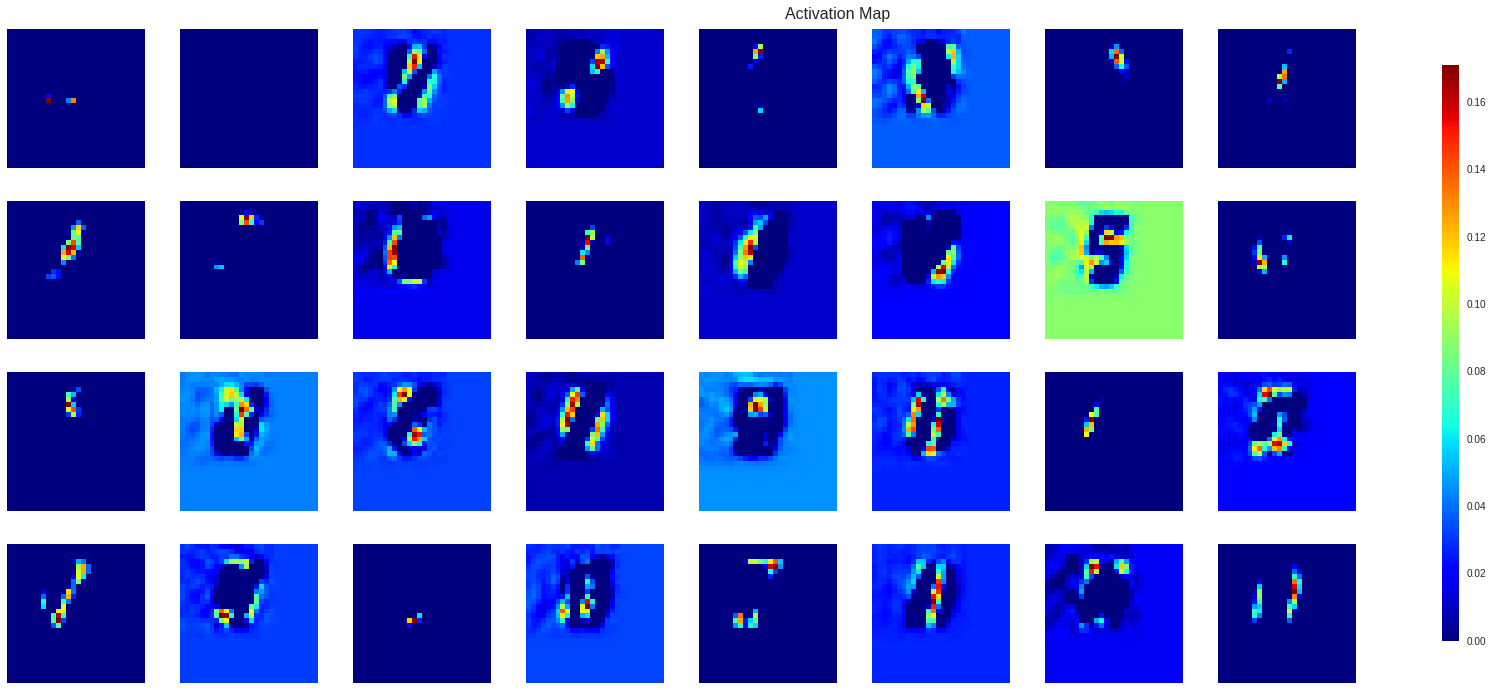

In [64]:
layer_outputs = [layer.output for layer in model2.layers]
activation_model = Model(inputs=model2.input, outputs=layer_outputs)
x = testData[311]
print(x.shape)
activations = activation_model.predict((x).reshape(1,28,28,3))

plt.figure()
plt.imshow(x)
plt.grid(False)
plt.axis('off')
# plt.set_yticklabels([])
# plt.set_xticklabels([])
# plt.show()
plt.savefig('img.png')
 
def display_activation(activations, col_size, row_size, act_index): 
    size = activations[0].shape[1]
    scale = 1. / size
    activation = activations[act_index]
    activation_index=0
    plt.figure()
    
    fig, ax = plt.subplots(row_size, col_size, figsize=(24,10))
    fig.suptitle('Activation Map', fontsize=16)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].grid(False)
            ax[row][col].set_yticklabels([])
            ax[row][col].set_xticklabels([])

            im = ax[row][col].imshow(activation[0, :, :, activation_index], cmap='jet', aspect='auto')
            activation_index += 1
#     plt.colorbar()
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.10, 0.01, 0.8])
    fig.colorbar(im, cax=cbar_ax, aspect=10)

    plt.savefig('abc.png')
# activations.shape
display_activation(activations, 8, 4 ,0 )

In [0]:
# print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       406
           2       1.00      1.00      1.00       385
           3       1.00      1.00      1.00       417
           4       1.00      1.00      1.00       391
           5       1.00      1.00      1.00       378
           6       1.00      1.00      1.00       373
           7       1.00      1.00      1.00       411
           8       1.00      1.00      1.00       393
           9       1.00      1.00      1.00       404
          10       1.00      1.00      1.00       399
          11       1.00      1.00      1.00       403
          12       1.00      1.00      1.00       392
          13       1.00      1.00      1.00       397
          14       1.00      1.00      1.00       408
          15       1.00      1.00      1.00       411
          16       1.00      1.00      1.00       391
          17       1.00    

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation="relu"))

model.add(tf.keras.layers.Dense(96, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


# print(y_train.shape)

model.fit(nx, zy, batch_size=64, epochs=3)

score = model.evaluate(testData, testY)
pred = model2.predict(testData)
print('\n', 'Test Acc = ', score[1])
# print('\n'," Predictions: ", pred)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        4736      
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              6423552   
_________________________________________________________________
dense_5 (Dense)              (None, 96)                98400     
Total params: 6,526,816
Trainable params: 6,526,752
Non-trainable params: 64
_________________________________________________________________

In [0]:
# print("some" ,end="\\\\ \\hline")

some\\ \hline

In [0]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,3)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model2.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model2.add(tf.keras.layers.BatchNormalization())
# model2.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same", input_shape=(28, 28,3)))
# model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model2.add(tf.keras.layers.Conv2D(36, (7, 7), strides=1, activation='relu', padding="same"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(1024, activation="relu"))

model2.add(tf.keras.layers.Dense(96, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

# print(y_train.shape)
num_epochs = 3
infoFit = model2.fit(nx, zy, batch_size=64, epochs=num_epochs)

score = model2.evaluate(testData, testY)
pred = model2.predict(testData)
print('\n', 'Test Acc = ', score[1])
# print('\n'," Predictions: ", pred)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 28, 28, 36)        5328      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 36)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 14, 14, 36)        63540     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
batch_normalization_v1_34 (B (None, 7, 7, 36)          144       
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 7, 7, 36)          63540     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 3, 3, 36)          0         
__________